In [1]:
import numpy as np
from luwiji.knn import illustration

## Avoid the data leakage (hindari kebocoran data)

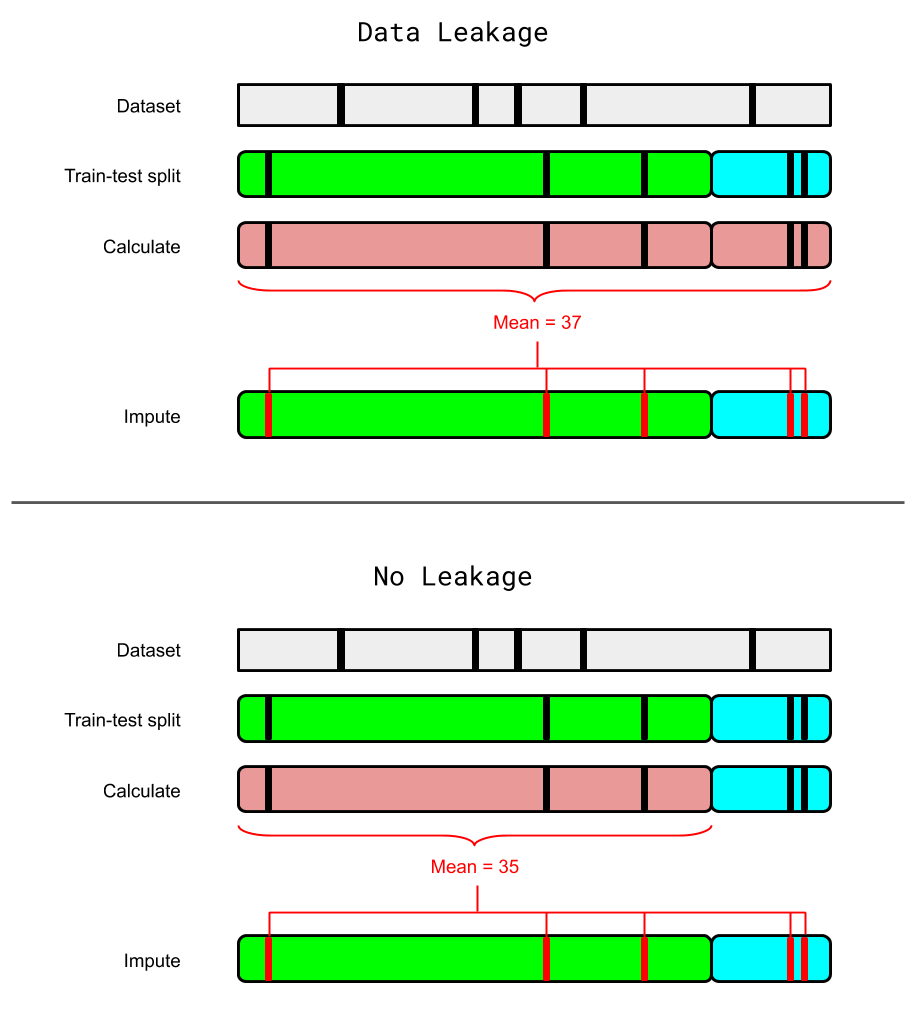

In [2]:
illustration.data_leakage

## Train-val-test split

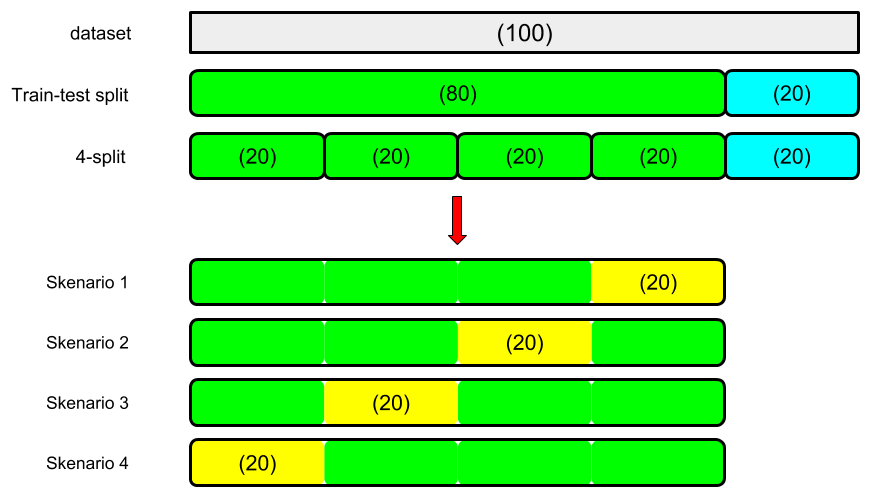

In [3]:
illustration.train_val_test

### Siapkan data tanpa fillna dan get_dummies

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin", "Age"], inplace=True)
df.head()

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
PassengerId                                                          
1                   0       3    male      1      0   7.2500        S
2                   1       1  female      1      0  71.2833        C
3                   1       3  female      0      0   7.9250        S
4                   1       1  female      1      0  53.1000        S
5                   0       3    male      0      0   8.0500        S

In [6]:
X = df.drop(columns=["Survived"])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

### Preprocessor

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [8]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

In [9]:
from sklearn.compose import ColumnTransformer
X_train.head()

Pclass     Sex  SibSp  Parch      Fare Embarked
PassengerId                                                 
693               3    male      0      0   56.4958        S
482               2    male      0      0    0.0000        S
528               1    male      0      0  221.7792        S
856               3  female      0      1    9.3500        S
802               2  female      1      1   26.2500        S

In [10]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["SibSp","Parch","Fare"]),
    ("categoric", categorical_pipeline, ["Pclass","Sex","Embarked"])
])

#### Pipeline

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                   

In [14]:
pipeline.score(X_test, y_test)

0.776536312849162

### Grid Search CV

In [15]:
pipeline.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numeric',
                                    Pipeline(memory=None,
                                             steps=[('imputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='mean',
                                                                   verbose=0)),
                                                    ('scaler',
                                                     MinMaxScaler(copy=True,
                                

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameter = {
    "algo__n_neighbors": range(1,51,2),
    "algo__weights": ["uniform","distance"],
    "algo__p": [1,2]
}

model = GridSearchCV(pipeline, parameter, cv=3, verbose=1, n_jobs=1)
model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   12.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                        

In [18]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
36       0.016657  9.425722e-04         0.024318    4.701903e-04   
28       0.017323  4.719885e-04         0.023652    4.714834e-04   
40       0.016657  4.712581e-04         0.024318    4.713705e-04   
54       0.016989  8.156588e-04         0.024984    1.215701e-06   
38       0.016990  1.123916e-07         0.023985    3.371748e-07   
..            ...           ...              ...             ...   
5        0.037642  1.254344e-02         0.021653    1.188795e-02   
3        0.023654  8.050485e-03         0.012993    4.965427e-03   
2        0.018656  4.700220e-04         0.023985    1.140650e-06   
1        0.022653  2.622471e-03         0.012659    3.770570e-03   
0        0.029648  6.940064e-03         0.026318    5.432843e-03   

   param_algo__n_neighbors param_algo__p param_algo__weights  \
36                      19             1             uniform   
28                      15             1             uniform   
40                      21             1             uniform   
54                      27             2             uniform   
38                      19             2             uniform   
..                     ...           ...                 ...   
5                        3             1            distance   
3                        1             2            distance   
2                        1             2             uniform   
1                        1             1            distance   
0                        1             1             uniform   

                                               params  split0_test_score  \
36  {'algo__n_neighbors': 19, 'algo__p': 1, 'algo_...           0.815126   
28  {'algo__n_neighbors': 15, 'algo__p': 1, 'algo_...           0.815126   
40  {'algo__n_neighbors': 21, 'algo__p': 1, 'algo_...           0.815126   
54  {'algo__n_neighbors': 27, 'algo__p': 2, 'algo_...           0.815126   
38  {'algo__n_neighbors': 19, 'algo__p': 2, 'algo_...           0.815126   
..                                                ...                ...   
5   {'algo__n_neighbors': 3, 'algo__p': 1, 'algo__...           0.760504   
3   {'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...           0.768908   
2   {'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...           0.768908   
1   {'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...           0.764706   
0   {'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...           0.764706   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
36           0.818565           0.805907         0.813200        0.005344   
28           0.810127           0.810127         0.811793        0.002357   
40           0.818565           0.801688         0.811793        0.007282   
54           0.827004           0.793249         0.811793        0.013981   
38           0.814346           0.805907         0.811793        0.004174   
..                ...                ...              ...             ...   
5            0.734177           0.759494         0.751392        0.012179   
3            0.670886           0.734177         0.724657        0.040579   
2            0.670886           0.734177         0.724657        0.040579   
1            0.670886           0.725738         0.720443        0.038484   
0            0.670886           0.725738         0.720443        0.038484   

    rank_test_score  
36                1  
28                2  
40                2  
54                2  
38                2  
..              ...  
5                95  
3                97  
2                97  
1                99  
0                99  

[100 rows x 14 columns]

In [19]:
model.best_params_

{'algo__n_neighbors': 19, 'algo__p': 1, 'algo__weights': 'uniform'}

In [20]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8188202247191011, 0.7877094972067039)

### Prediction

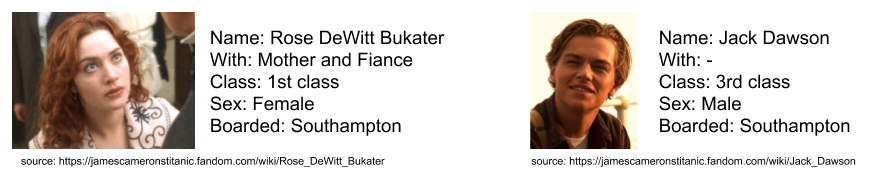

In [21]:
illustration.jack_and_rose

In [22]:
X.iloc[0:1]

Pclass   Sex  SibSp  Parch  Fare Embarked
PassengerId                                           
1                 3  male      1      0  7.25        S

In [24]:
data = [
    [1,"female",1,1,80,"S"],
    [3,"male",0,0,5,"S"]
]

X_pred = pd.DataFrame(data, index=["Rose","Jack"], columns=X.columns)
X_pred

Pclass     Sex  SibSp  Parch  Fare Embarked
Rose       1  female      1      1    80        S
Jack       3    male      0      0     5        S

In [25]:
model.predict(X_pred)

array([1, 0], dtype=int64)

In [26]:
X_pred["Survived"] = model.predict(X_pred)
X_pred

Pclass     Sex  SibSp  Parch  Fare Embarked  Survived
Rose       1  female      1      1    80        S         1
Jack       3    male      0      0     5        S         0

In [29]:
from jcopml.utils import save_model

In [32]:
save_model(model, "knn_titanic.pkl")

Model is pickled as model/knn_titanic.pkl


In [33]:
save_model(model.best_estimator_, "knn_titanic_small.pkl") #small model

Model is pickled as model/knn_titanic_small.pkl


### Load Model

In [34]:
from jcopml.utils import load_model

In [39]:
model_yang_di_load = load_model("model/knn_titanic_small.pkl")

In [40]:
model_yang_di_load.predict(X_pred)

C:\anaconda\envs\course1\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([1, 0], dtype=int64)

In [41]:
model_yang_di_load_all = load_model("model/knn_titanic.pkl")

In [43]:
model_yang_di_load_all.cv_results_

{'mean_fit_time': array([0.02964775, 0.02265255, 0.01865625, 0.02365367, 0.03664557,
        0.0376416 , 0.01732357, 0.01765529, 0.01698867, 0.01732318,
        0.01665656, 0.01732246, 0.01698947, 0.01698987, 0.01698987,
        0.01765633, 0.01698971, 0.01665703, 0.01665656, 0.01732373,
        0.01665703, 0.01732365, 0.01698987, 0.01698931, 0.01698995,
        0.01698963, 0.01698995, 0.01698939, 0.01732262, 0.03331439,
        0.02764789, 0.01765601, 0.01765672, 0.01632373, 0.01632357,
        0.01698971, 0.01665711, 0.01698987, 0.01698979, 0.01732278,
        0.01665696, 0.01665664, 0.01665664, 0.01698963, 0.01698971,
        0.01765537, 0.01732294, 0.01765537, 0.01765649, 0.01732262,
        0.01699003, 0.01732326, 0.01698979, 0.01732326, 0.01698947,
        0.01666665, 0.01632301, 0.01898694, 0.01632325, 0.01632293,
        0.02032177, 0.02298347, 0.01698939, 0.01798892, 0.01632317,
        0.01698971, 0.01665688, 0.01632317, 0.01632309, 0.01632317,
        0.01665624, 0.01665624,

### Optional Save Model (pickle)

In [44]:
import pickle

In [45]:
pickle.dump(model, open("knn.pkl", "wb")) # save model dengan pickle

In [46]:
model = pickle.load(open("knn.pkl", "rb")) #load model

In [47]:
model.predict(X_pred)

C:\anaconda\envs\course1\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([1, 0], dtype=int64)